<a href="https://colab.research.google.com/github/Venkatesh-Amadasani/venkyama/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 131543: invalid continuation byte

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/laptop_price.csv",encoding='latin')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
df.drop(columns=['laptop_ID'],inplace=True)

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
943,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
df.duplicated().sum()

np.int64(28)

In [ ]:
df[df.duplicated()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1275, 12)

In [ ]:
df['Price']=(df['Price_euros']*90.96).astype('int')
df.drop(columns=['Price_euros'],inplace=True)

In [ ]:
df.sample()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1073,HP,ProBook 430,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.49kg,99146


In [ ]:
# EDA
# - Univariate Analysis
# - Multi-Variate Analysis

In [ ]:
# Company Column
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [ ]:
9+7+7+6+4+4+3+3+3+3+2

51

In [ ]:
plt.rcParams['figure.figsize']=[6,3.5]  # The default setting for entire notebook
# plt.figure(figsize=(10,8)) # individual graphs

<Axes: xlabel='Company'>

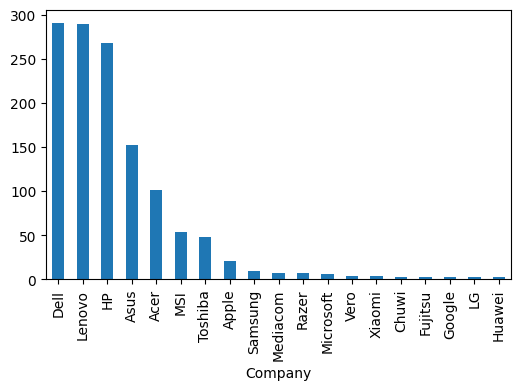

In [ ]:
df['Company'].value_counts().plot(kind='bar')

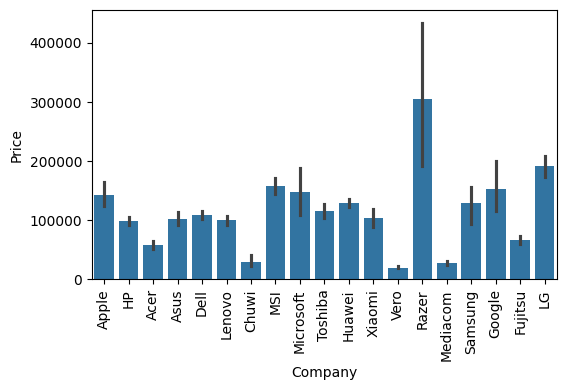

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df=df[df.groupby('Company').Company.transform('count')>10].copy()

In [ ]:
1275-1224

51

In [ ]:
df.shape

(1224, 12)

In [ ]:
df=df.reset_index(drop=True)

<Axes: xlabel='Company'>

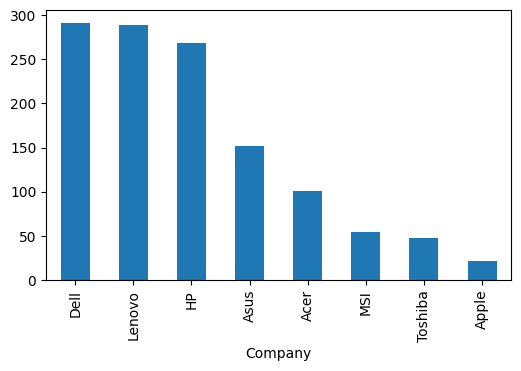

In [ ]:
df['Company'].value_counts().plot(kind='bar')

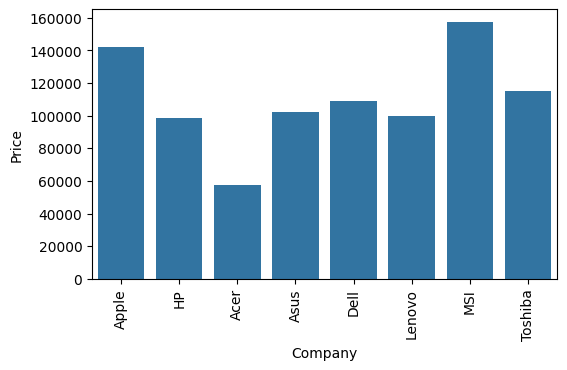

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Product'].value_counts()

,count
Product,
XPS 13,30
Inspiron 3567,25
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
...,...
Portege X30-D-10L,1
Zenbook UX390UA,1
Portege X30-D-10J,1


In [ ]:
df.drop(columns=['Product'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
385,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Linux,2.33kg,70846


In [ ]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,688
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


<Axes: xlabel='TypeName'>

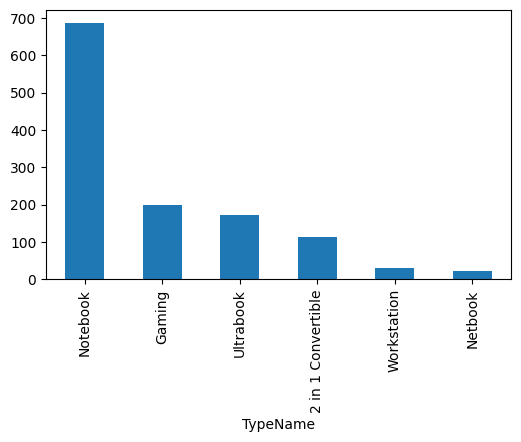

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

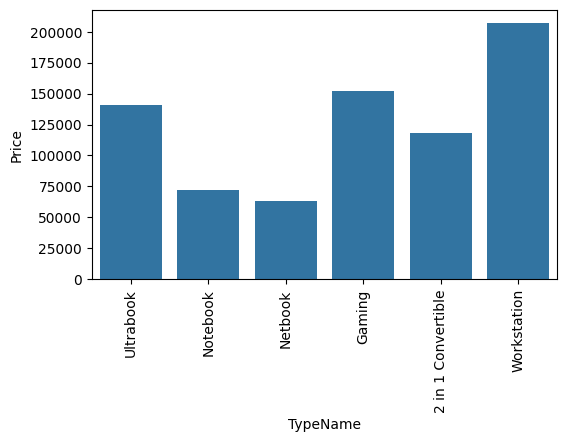

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,637
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [ ]:
# 15.6 : 15 inch
# 14.0 : 14 inch
# 17.3 : 17 inch
# 13.3 : 13 inch

<Axes: xlabel='Inches'>

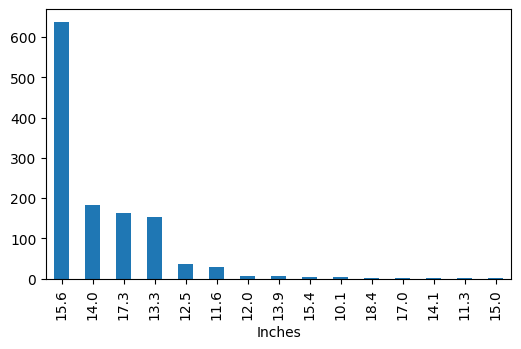

In [ ]:
df['Inches'].value_counts().plot(kind='bar')

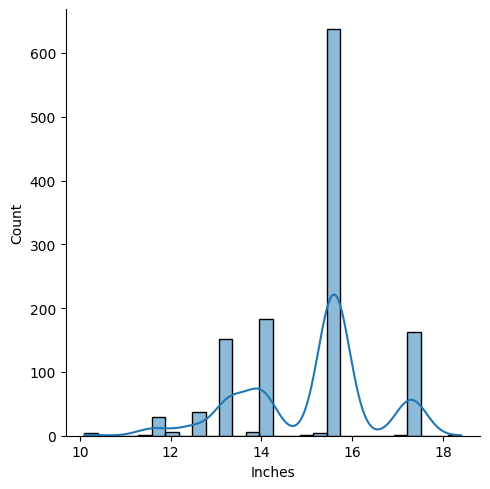

In [ ]:
sns.displot(x=df['Inches'],kde=True)

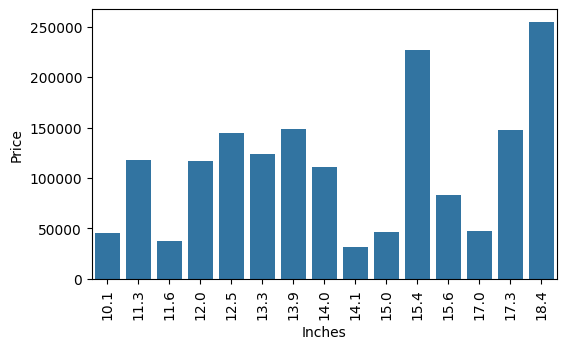

In [ ]:
sns.barplot(x=df['Inches'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,492
1366x768,258
IPS Panel Full HD 1920x1080,217
IPS Panel Full HD / Touchscreen 1920x1080,48
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
# X_res  : horizontal pixels
# Y_res  : vertical pixels
# IPS    : IPS panel or not
# Touchscreen : Touchscreen or not

In [ ]:
a="IPS Panel Full HD / Touchscreen 1920x1080"

In [ ]:
a.split()

['IPS', 'Panel', 'Full', 'HD', '/', 'Touchscreen', '1920x1080']

In [ ]:
a.split()[-1]

'1920x1080'

In [ ]:
a.split()[-1].split('x')

['1920', '1080']

In [ ]:
a.split()[-1].split('x')[0]

'1920'

In [ ]:
a.split()[-1].split('x')[1]

'1080'

In [ ]:
(lambda x:x.split()[-1].split('x')[0])("IPS Panel Full HD / Touchscreen 1920x1080")

'1920'

In [ ]:
(lambda x:x.split()[-1].split('x')[1])("IPS Panel Full HD / Touchscreen 1920x1080")

'1080'

In [ ]:
(lambda x:1 if "IPS" in x else 0)(" Panel Full HD /  1920x1080")

0

In [ ]:
df['X_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0]).astype('int')
df['Y_res']=df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[1]).astype('int')
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0).astype('int')
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0).astype('int')

In [ ]:
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
102,HP,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58kg,59942,1920,1080,0,1
1078,HP,Ultrabook,12.5,1366x768,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,172369,1366,768,0,0
937,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,49937,1920,1080,0,0
699,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.2kg,176007,1920,1080,0,1
1055,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,4GB,16GB SSD,Intel HD Graphics,Chrome OS,2.20kg,19010,1366,768,0,0
568,Dell,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,54848,1366,768,1,0


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
204,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,2.1kg,31745,1920,1080,0,0


In [ ]:
df['Ram'].value_counts()

,count
Ram,
8GB,595
4GB,351
16GB,186
6GB,34
12GB,25
32GB,15
2GB,14
24GB,3
64GB,1


In [ ]:
df['Ram']=df['Ram'].apply(lambda x:x.replace("GB","")).astype('int')

In [ ]:
df['Ram'].value_counts()

,count
Ram,
8,595
4,351
16,186
6,34
12,25
32,15
2,14
24,3
64,1


<Axes: xlabel='Ram'>

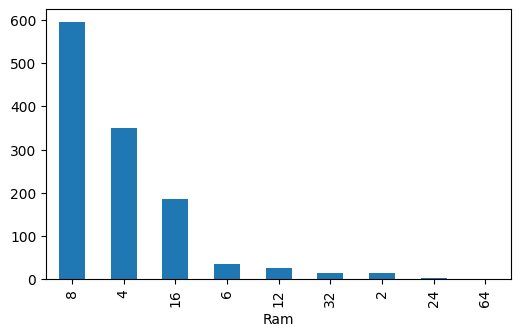

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

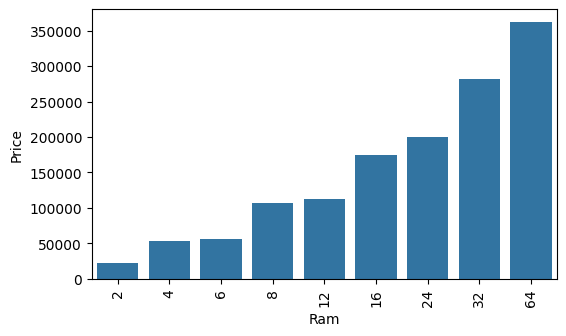

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,124
Intel Core i5 8250U 1.6GHz,71
Intel Core i7 8550U 1.8GHz,71
...,...
Intel Pentium Dual Core 4405Y 1.5GHz,1
Intel Core M 6Y54 1.1GHz,1
AMD E-Series 9000 2.2GHz,1


In [ ]:
a="Intel Core i5 8250U 1.6GHz"

In [ ]:
(lambda a:" ".join(a.split()[0:3]))("Intel Core i5 8250U 1.6GHz")

'Intel Core i5'

In [ ]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,493
Intel Core i5,411
Intel Core i3,134
Intel Celeron Dual,66
Intel Pentium Quad,27
Intel Core M,16
AMD A9-Series 9420,12
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [ ]:
def fetch_processor_name(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core M':
    return text
  elif text.split()[0]=='Intel':
    return " ".join(text.split()[0:2])
  else:
    return "AMD Processor"

In [ ]:
df['Cpu']=df['Cpu'].apply(fetch_processor_name)

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,493
Intel Core i5,411
Intel Core i3,134
Intel Celeron,71
AMD Processor,60
Intel Pentium,30
Intel Core M,16
Intel Atom,5
Intel Xeon,4


<Axes: xlabel='Cpu'>

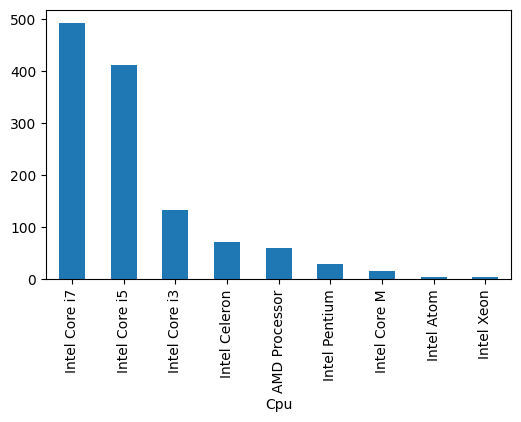

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

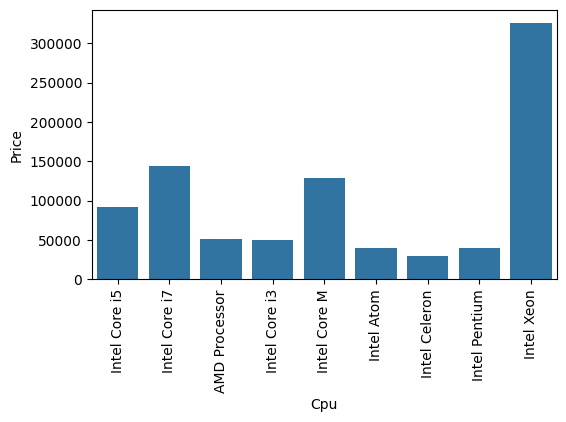

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,393
1TB HDD,214
500GB HDD,124
512GB SSD,105
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,29
2TB HDD,16


In [ ]:
# -- Due to complexity in handling various storage options, we will skip the memory column

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
922,HP,Notebook,15.6,Intel Core i3,4,Intel HD Graphics 620,Windows 10,2.04kg,62307,1920,1080,0,0


In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,265
Intel HD Graphics 520,179
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,65
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 M315,1
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1


In [ ]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel,666
Nvidia,385
AMD,173


<Axes: xlabel='Gpu'>

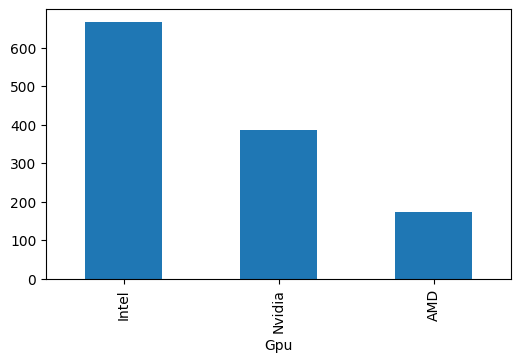

In [ ]:
df['Gpu'].value_counts().plot(kind='bar')

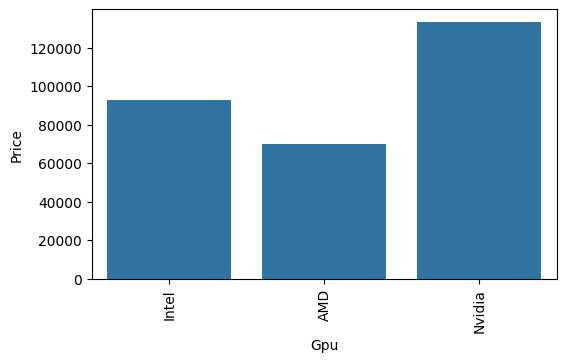

In [ ]:
sns.barplot(x=df['Gpu'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1011
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,13
Mac OS X,8
Windows 10 S,2
Android,2


In [ ]:
def fetch_os(text):
  if text=="Windows 10" or text=="Windows 10 S":
    return "Windows 10"
  elif text=="Windows 7":
    return text
  elif text=="Mac OS X" or text=="macOS":
    return "Mac OS"
  else:
    return "Linux/No OS/Others"

In [ ]:
df['OpSys']=df['OpSys'].apply(fetch_os)

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1013
Linux/No OS/Others,145
Windows 7,45
Mac OS,21


<Axes: xlabel='OpSys'>

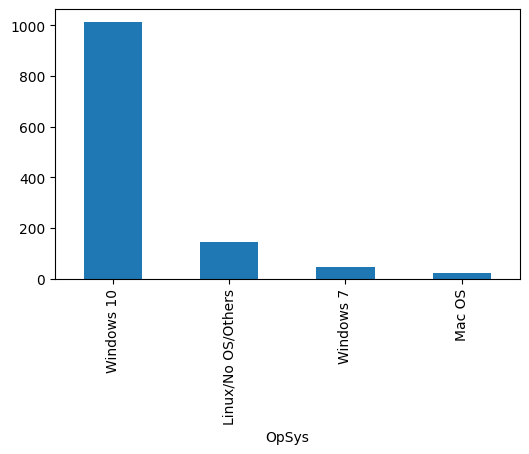

In [ ]:
df['OpSys'].value_counts().plot(kind='bar')

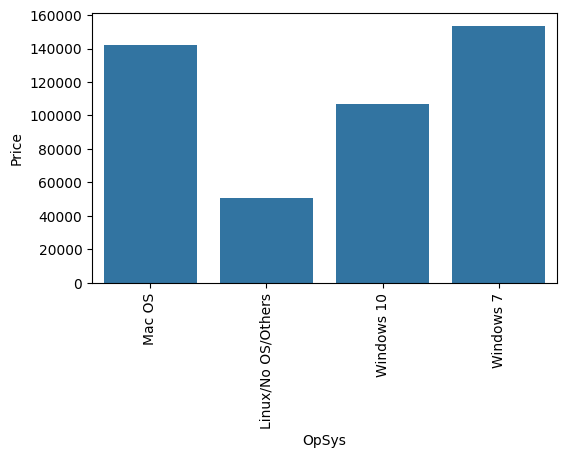

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Weight']

,Weight
0,1.37kg
1,1.34kg
2,1.86kg
3,1.83kg
4,1.37kg
...,...
1219,1.8kg
1220,1.3kg
1221,1.5kg
1222,2.19kg


In [ ]:
df['Weight']=df['Weight'].apply(lambda x:x.replace("kg","")).astype('float')

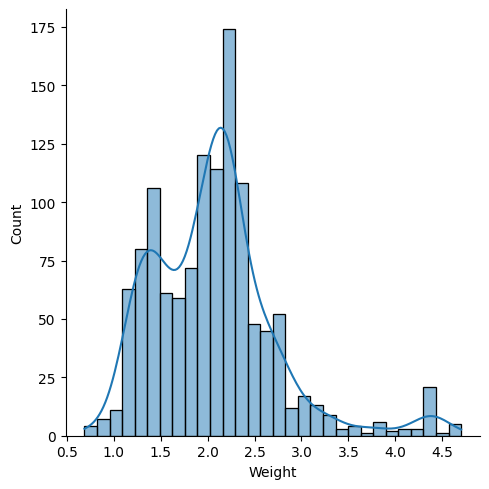

In [ ]:
sns.displot(x=df['Weight'],kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

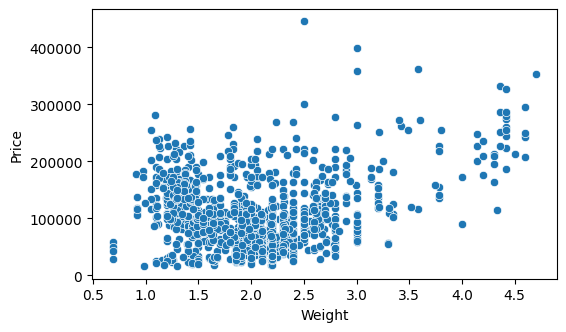

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,X_res,Y_res,Touchscreen,IPS
740,Asus,2 in 1 Convertible,15.6,Intel Core i7,12,Nvidia,Windows 10,2.3,76315,1920,1080,1,0


In [ ]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1055
1,169


<Axes: xlabel='Touchscreen'>

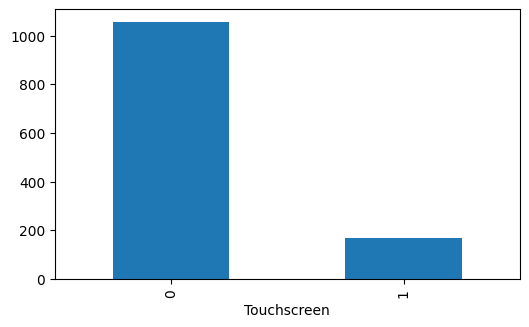

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

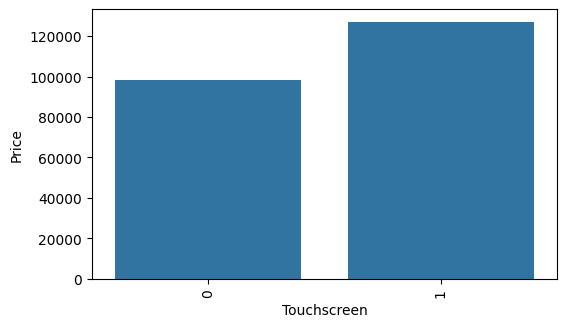

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='IPS'>

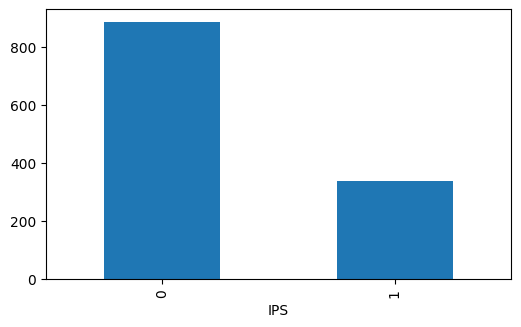

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

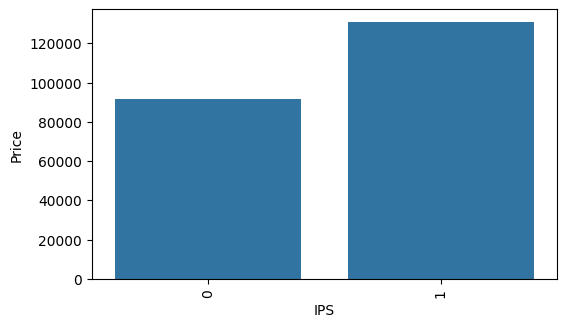

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'],errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price,X_res,Y_res,Touchscreen,IPS
Inches,1.000000,0.239155,0.824959,0.055330,-0.057739,-0.071772,-0.359497,-0.104090
Ram,0.239155,1.000000,0.394187,0.726639,0.415731,0.412278,0.094037,0.223322
Weight,0.824959,0.394187,1.000000,0.212038,-0.025155,-0.036765,-0.291506,0.038753
Price,0.055330,0.726639,0.212038,1.000000,0.553707,0.552964,0.161443,0.289226
X_res,-0.057739,0.415731,-0.025155,0.553707,1.000000,0.997454,0.320954,0.283969
Y_res,-0.071772,0.412278,-0.036765,0.552964,0.997454,1.000000,0.317174,0.294360
Touchscreen,-0.359497,0.094037,-0.291506,0.161443,0.320954,0.317174,1.000000,0.154500
IPS,-0.104090,0.223322,0.038753,0.289226,0.283969,0.294360,0.154500,1.000000


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.055330
Ram,0.726639
Weight,0.212038
Price,1.000000
X_res,0.553707
Y_res,0.552964
Touchscreen,0.161443
IPS,0.289226


In [ ]:
# Pixel density(ppi) is a much better measure than X_res and Y_res

In [ ]:
df['ppi']=round(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('int')

In [ ]:
df['ppi']

,ppi
0,227
1,128
2,141
3,221
4,227
...,...
1219,157
1220,276
1221,112
1222,100


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.055330
Ram,0.726639
Weight,0.212038
Price,1.000000
X_res,0.553707
Y_res,0.552964
Touchscreen,0.161443
IPS,0.289226
ppi,0.483821


In [ ]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [ ]:
df['ppi'].value_counts()

,count
ppi,
141,419
100,195
127,131
157,122
166,100
112,42
135,28
176,25
276,25


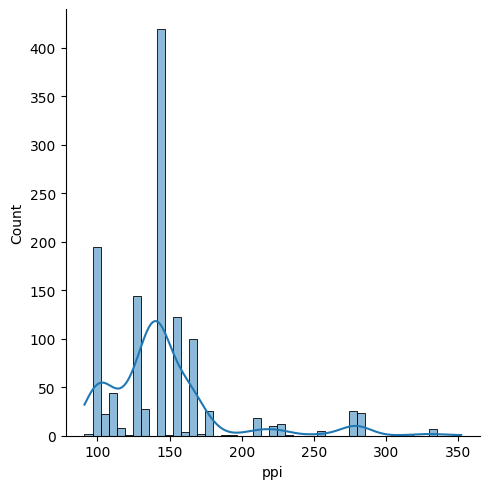

In [ ]:
sns.displot(x=df['ppi'],kde=True)

<Axes: xlabel='ppi', ylabel='Price'>

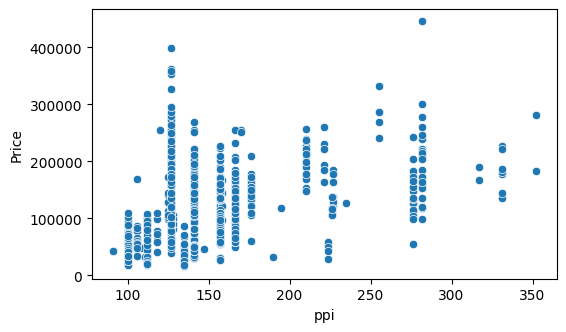

In [ ]:
sns.scatterplot(x=df['ppi'],y=df['Price'])

In [ ]:
df.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,164055,0,1,227


In [ ]:
df.shape

(1224, 11)

In [ ]:
df.to_csv("laptop_data_cleaned.csv",index=False)

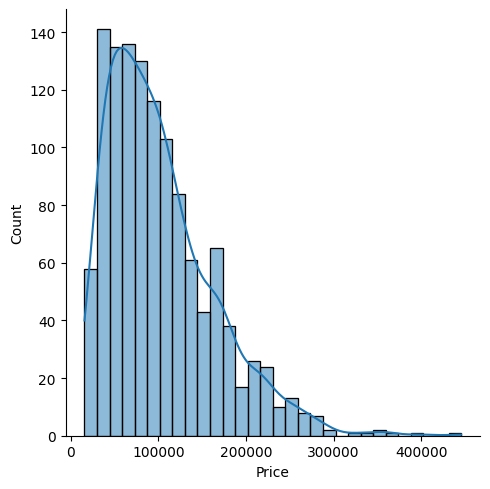

In [ ]:
sns.displot(x=df['Price'],kde=True)
plt.show()

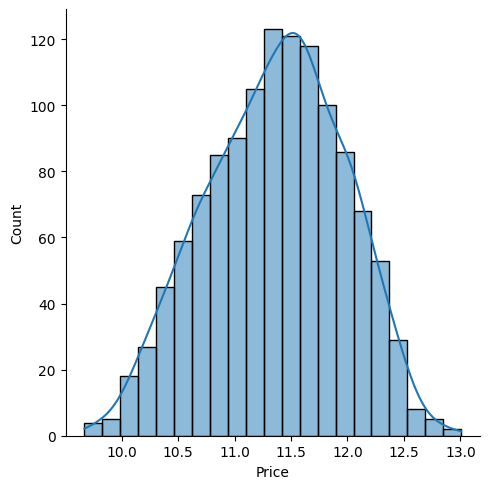

In [ ]:
sns.displot(x=np.log(df['Price']),kde=True)
plt.show()

In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
X.shape

(1224, 10)

In [ ]:
X_train.shape

(1040, 10)

In [ ]:
X_test.shape

(184, 10)

In [ ]:
1224*0.85

1040.3999999999999

In [ ]:
X.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227
1,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.34,0,0,128
2,HP,Notebook,Intel Core i5,8,Intel,Linux/No OS/Others,1.86,0,0,141
3,Apple,Ultrabook,Intel Core i7,16,AMD,Mac OS,1.83,0,1,221
4,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227


In [ ]:
X_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
240,Apple,Ultrabook,Intel Core i5,8,Intel,Mac OS,1.37,0,1,227
439,Lenovo,Notebook,Intel Core i5,8,Intel,Windows 10,1.65,0,0,157
192,Dell,Gaming,Intel Core i7,16,Nvidia,Windows 10,2.65,0,1,282
218,Asus,Notebook,Intel Core i5,8,Nvidia,Windows 10,2.00,0,0,141
184,Dell,Notebook,Intel Core i7,8,AMD,Windows 10,2.80,0,0,127


In [ ]:
y_train.head()

,Price
240,12.131123
439,11.714568
192,12.030653
218,11.155507
184,11.499749


In [ ]:
X_test.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
661,Lenovo,Notebook,Intel Core i5,4,Intel,Windows 10,1.70,0,0,157
220,HP,Notebook,Intel Core i7,8,AMD,Windows 10,1.90,0,0,141
155,Dell,2 in 1 Convertible,Intel Core i7,8,Intel,Windows 10,1.56,1,0,141
677,Lenovo,Workstation,Intel Core i7,16,Nvidia,Windows 7,2.18,0,0,141
911,Dell,2 in 1 Convertible,Intel Core i5,8,Intel,Windows 10,1.24,1,0,166


In [ ]:
y_test.head()

,Price
661,11.060070
220,11.656402
155,11.466012
677,12.036055
911,12.059502


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
613,Lenovo,Gaming,Intel Core i7,8,Nvidia,Windows 10,2.5,0,1,141


In [ ]:
# LinearRegression
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.784985482870678
MAE: 0.20009186638712767
MSE: 0.06789066706487663


In [ ]:
# Lasso
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7924904607933325
MAE: 0.19507784204024442
MSE: 0.06552097610503446


In [ ]:
# Ridge
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=Ridge(alpha=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7911478899674748
MAE: 0.19647484813345853
MSE: 0.06594489180229178


In [ ]:
# KNeighborsRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7855304608773771
MAE: 0.19255042415887552
MSE: 0.06771859068182835


In [ ]:
# DecisionTreeRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8030039085549431
MAE: 0.18864591614706444
MSE: 0.062201363126259734


In [ ]:
# Support Vector Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8144162220880313
MAE: 0.1811312900754648
MSE: 0.05859793397710663


In [ ]:
# AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=AdaBoostRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.7910101268012173
MAE: 0.20920605109215004
MSE: 0.06598839041521833


In [ ]:
# RandomForestRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8598333720613768
MAE: 0.1613356612323587
MSE: 0.04425750408873109


In [ ]:
# eXtreme Gradient Boosting Regressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=XGBRegressor(n_estimators=50,max_depth=4)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8775469222718489
MAE: 0.14592216222317725
MSE: 0.03866446434456888


In [ ]:
# GradientBoostingRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=300)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print("R2 score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R2 score: 0.8802163398449601
MAE: 0.1441524991130959
MSE: 0.037821597815681354


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
!pip install streamlit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

df=pickle.load(open('df.pkl','rb'))
pipe=pickle.load(open('pipe.pkl','rb'))

st.title("Laptop Price Predictor")
company=st.selectbox("Brand",df['Company'].unique(),index=4)
type=st.selectbox("Type",df['TypeName'].unique(),index=1)
cpu=st.selectbox("Processor",df['Cpu'].unique(),index=0)
ram=st.selectbox("RAM(in GB)",[2,4,6,8,12,16,24,32,64,128],index=3)
gpu=st.selectbox("GPU",df['Gpu'].unique(),index=0)

Writing app.py


In [ ]:
X_train.sample()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,ppi
691,Lenovo,Ultrabook,Intel Core i5,8,Intel,Windows 10,1.32,0,1,157


In [ ]:
df['Gpu'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [ ]:
!curl -k https://loca.lt/mytunnelpassword

34.138.37.225

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.37.225:8501

⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://smooth-ways-talk.loca.lt
2025-10-16 17:00:05.672 Failed to schedule watch observer for path /content
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/streamlit/watcher/event_based_path_watcher.py", line 186, in watch_path
    folder_handler.watch = self._observer.schedule(
                           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/watchdog/observers/api.py", line 312, in schedule
    emitter.start()
  File "/usr/local/lib/python3.12/dist-packages/watchdog/utils/__init__.py", line 75, in start
    self.on_thread_start()
  File "/usr/local/lib/python3.12/dist-packages/watchdog/observers/inotify.py", line 119, in on_thread_start
    self._inotify = InotifyBuffer(path, recursive=self.watch.is_rec

KeyboardInterrupt: 